In [ ]:
import pandas as pd

# Charger les fichiers CSV
gender_submission_path = 'gender_submission.csv'
test_path = 'test.csv'
train_path = 'train.csv'

# Lire les fichiers
gender_submission = pd.read_csv(gender_submission_path)
test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)

# Afficher les premières lignes de chaque fichier
gender_submission_head = gender_submission.head(5)
test_data_head = test_data.head(5)
train_data_head = train_data.head(5)



(gender_submission_head, test_data_head, train_data_head)


(   PassengerId  Survived
 0          892         0
 1          893         1
 2          894         0
 3          895         0
 4          896         1,
    PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  ,
    Pa

In [ ]:
gender_submission_info = gender_submission.info()
test_data_info = test_data.info()
train_data_info = train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Fonction pour prétraiter les données
def preprocess_data(df, is_train=True):
    # Conserver les colonnes pertinentes
    columns_to_keep = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    if is_train:
        columns_to_keep.append('Survived')

    df = df[columns_to_keep]

    # Remplacer les valeurs manquantes
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Encoder les colonnes catégoriques
    label_encoders = {}
    for col in ['Sex', 'Embarked']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders

# Prétraitement des données d'entraînement
train_data_processed, label_encoders_train = preprocess_data(train_data, is_train=True)

# Prétraitement des données de test
test_data_processed, label_encoders_test = preprocess_data(test_data, is_train=False)





# Séparer les features (X) et la cible (y) dans les données d'entraînement
X = train_data_processed.drop('Survived', axis=1)
y = train_data_processed['Survived']

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher un aperçu des données prétraitées
X_train.head(), y_train.head()


<ipython-input-3-0023057937c2>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-0023057937c2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-0023057937c2>:15: FutureWarning: A value is trying to be set on 

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 331       1    1  45.5      0      0  28.5000         2
 733       2    1  23.0      0      0  13.0000         2
 382       3    1  32.0      0      0   7.9250         2
 704       3    1  26.0      1      0   7.8542         2
 813       3    0   6.0      4      2  31.2750         2,
 331    0
 733    0
 382    0
 704    0
 813    0
 Name: Survived, dtype: int64)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Epoch 1/150


<ipython-input-15-ccab7818e8f1>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-15-ccab7818e8f1>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5363 - loss: 0.8385 - val_accuracy: 0.5028 - val_loss: 0.6779
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6626 - loss: 0.6965 - val_accuracy: 0.7207 - val_loss: 0.6453
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7012 - loss: 0.5960 - val_accuracy: 0.7709 - val_loss: 0.6259
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7295 - loss: 0.5944 - val_accuracy: 0.7709 - val_loss: 0.6125
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7334 - loss: 0.5885 - val_accuracy: 0.7877 - val_loss: 0.6009
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7667 - loss: 0.5107 - val_accuracy: 0.7933 - val_loss: 0.5888
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7566 - loss: 0.5195 - val_accuracy: 0.7933 - val_loss: 0.5776
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7848 - loss: 0.5045 - val_accuracy: 0.7877 - val_loss: 0.

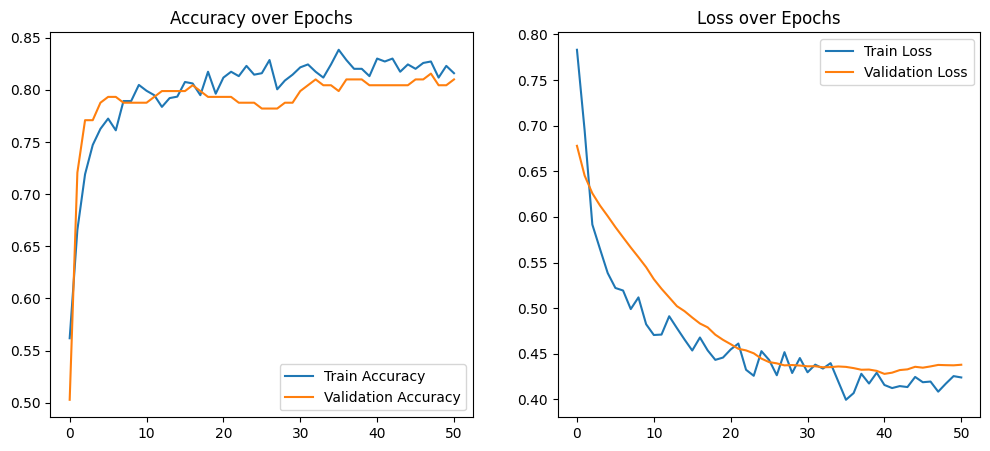

In [ ]:
# prompt: essaye d'ameliorer le model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Charger les données
try:
    gender_submission = pd.read_csv('gender_submission.csv')
    test_data = pd.read_csv('test.csv')
    train_data = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: One or more CSV files not found. Please ensure the files are in the current directory.")
    exit()


# Prétraitement des données
def preprocess_data(df, is_train=True):
    df = df.copy()  # Create a copy to avoid SettingWithCopyWarning
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    if is_train:
        features.append('Survived')
    df = df[features]

    # Gestion des valeurs manquantes
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Encodage des variables catégorielles
    le = LabelEncoder()
    for col in ['Sex', 'Embarked']:
        df[col] = le.fit_transform(df[col])

    # Feature engineering (example: family size)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    return df

train_data_processed = preprocess_data(train_data, is_train=True)
test_data_processed = preprocess_data(test_data, is_train=False)

# Séparation des données
X = train_data_processed.drop('Survived', axis=1)
y = train_data_processed['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_processed_scaled = scaler.transform(test_data_processed)

# Construction du modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=150, batch_size=64, callbacks=[early_stopping], verbose=1)


# Évaluation
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Prédictions et soumission
predictions = (model.predict(test_data_processed_scaled) > 0.5).astype(int)
submission_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions.flatten()})
submission_df.to_csv('submission.csv', index=False)

# Affichage des courbes d'apprentissage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_test = scaler.transform(test_data_processed)
y_pred = model.predict(y_test)
y_pred = (y_pred > 0.5)  # Convertir les probabilités en 0/1 (survie ou non)

# Calcul des métriques
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets